# Imports

In [ ]:
import numpy as np
import tensorflow as tf
import keras

from IPython.core.display import display
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

# Constants

In [ ]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = '03 Ocean.jpg'

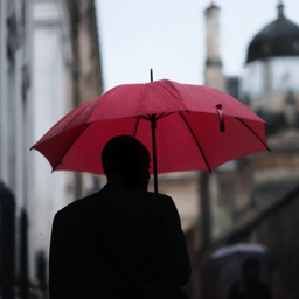

In [ ]:
pic = load_img(FILE_1, target_size=(299,299))  
display(pic)


In [ ]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [ ]:
expanded = np.expand_dims(pic_array, axis =0)
expanded.shape

(1, 299, 299, 3)

In [ ]:
preprocessed = preprocess_input(expanded)

# Load InceptionResNet

In [ ]:
%%time
inception_model = InceptionResNetV2(weights = 'imagenet')

225222656/225209952 [==============================] - 7s 0us/step
CPU times: user 5.49 s, sys: 1.11 s, total: 6.6 s
Wall time: 15.5 s


In [ ]:
inception_model.graph = tf.Graph()

# Making Predictions

In [ ]:
predictions = inception_model.predict(preprocessed)
decode_predictions(predictions)

49152/35363 [=========================================] - 0s 0us/step


[[('n04507155', 'umbrella', 0.82924384),
  ('n03792972', 'mountain_tent', 0.0012268262),
  ('n04479046', 'trench_coat', 0.0011062943),
  ('n03788195', 'mosque', 0.0010572344),
  ('n03220513', 'dome', 0.0010310981)]]

In [ ]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename, target_size=(299,299))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis =0)
  return preprocess_input(expanded)

In [ ]:
def format_img_vgg19(filename):
  pic = load_img(filename, target_size=(224,224))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis =0)
  return preprocess_input_vgg19(expanded)

In [ ]:
vgg19_model = VGG19()

574726144/574710816 [==============================] - 12s 0us/step


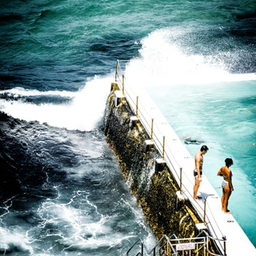

[[('n04347754', 'submarine', 0.16831084),
  ('n02894605', 'breakwater', 0.12554657),
  ('n03662601', 'lifeboat', 0.09670128),
  ('n09399592', 'promontory', 0.08424073),
  ('n02981792', 'catamaran', 0.08419359)]]

In [ ]:
data = format_img_vgg19(FILE_3)
pred = vgg19_model.predict(data)
display(load_img(FILE_3))
decode_vgg19(pred)